In [1]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore')
import matplotlib.pyplot as plt
from scipy.optimize import fmin

https://www.um.es/or/ampliacion/node21.html

Sea X una variable aleatoria con función de densidad  $f:I\rightarrow \mathbb{R} $. Supóngase que
$f(x)=Cg(x)h(x)$ con C una constante, $C\geq 1$, $0\leq g(x) \leq 1$ y h(x) una función de densidad en I. Si  $U\equiv U(0,1)$ e Y (con función de densidad $h$) son independientes, entonces 
$$h(x\vert U\leq g(Y))=f(x)$$


Intentemos utilizar el método para generar: $f(x) = 30(x^2-2x^3+x^4)$

In [2]:
N = 500
f = lambda x : 30*(x**2-2*x**3+x**4)
a = f(fmin(lambda x:-f(x),0,disp=0))
phi = lambda x: a*np.sin(np.pi*x)

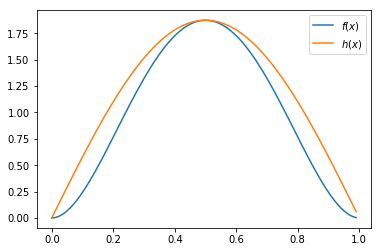

In [3]:
x = np.arange(0,1,.01)
plt.plot(x,f(x),label='$f(x)$')
plt.plot(x,phi(x),label='$h(x)$')
plt.legend()
plt.show()

$h(x) = \alpha\sin(\pi x), \alpha = max(f(x))$

$\phi(x) = C\,h(x) = 1.875C\sin(\pi x)$

$h(x)= \frac{\phi(x)}{C}$,se integra sobre $I : [0,1]\rightarrow C = \int_0^1 \phi(x) dx$

$C = \int_0^1 1.875\sin(\pi x) dx $

$=1.875(1 -\frac{\cos(\pi)}{\pi}) = 1.19366207$

In [4]:
1.875*(((1- np.cos(np.pi * 1))/np.pi))# - 1.875*((1- np.cos(np.pi * 0)/np.pi))

1.1936620731892151

$h(x) =1.570796327\sin(\pi x)$

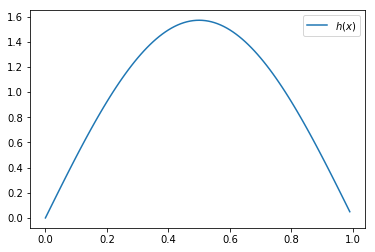

In [5]:
h = lambda x : 1.570796327*np.sin(np.pi*x)
plt.plot(x,h(x),label='$h(x)$')
plt.legend()
plt.show()

$h(x) =1.570796327\sin(\pi x), \int_0^x h(x) dx \rightarrow H(x) = 1.570796327\,(\frac{1 -\cos(\pi x)}{\pi}) : P(H(X)|X=x)$

$H^{-1}(x)=\frac{\arccos(1-\frac{\pi x}{1.570796327})}{\pi}$

$Y=H^{-1}(U),U\equiv U(0,1)$

$$h(x\vert U\leq g(Y))=f(x)$$

$$g(x)=\frac{f(x)}{C h(x)} = \frac{f(x)}{\phi(x)}$$
$$ℎ(𝑥|𝑈≤𝑔(𝑌))=𝑓(𝑥)$$

In [6]:
H_1 = lambda x: np.arccos((1-np.pi*x/1.570796327))/np.pi

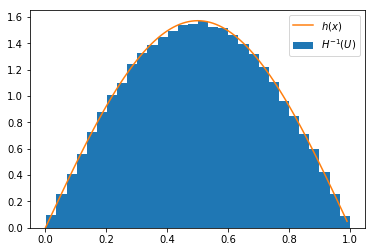

In [7]:
samples = 100000
bins = 30
plt.hist(list(map(lambda x: H_1(x),np.random.rand(samples))),weights=np.ones(samples)*bins/samples,bins=bins,label="$H^{-1}(U)$")
plt.plot(x,h(x),label='$h(x)$')
plt.legend()
plt.show()

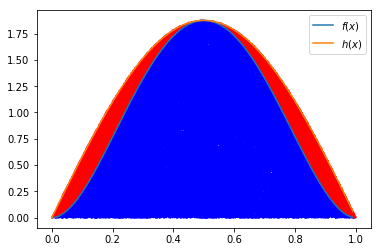

In [8]:
x = np.arange(0,1,.01)
w,y,z=zip(*map(lambda r1,r2:(r1,r2*phi(r1),'blue' if r2*phi(r1) < f(r1) else 'red'),H_1(np.random.rand(samples)),np.random.rand(samples)))
plt.scatter(w,y,color=z,s=1)
plt.plot(x,f(x),label='$f(x)$')
plt.plot(x,phi(x),label='$h(x)$')
plt.legend()
plt.show()

La probabilidad de aceptar viene dada por $\frac1 c$,dado que $c \ge 1$ para toda $c$.
$$C_{constante} :\frac1 {1.875} < C_{senoidal} :\frac1 {1.19366207}$$

Por lo tanto utilizar $C_{senoidal}$ es un generador de $f(x)$ más eficiente.